# Sentimental Analysis

**Natural Language Processing** or NLP is a branch of Artificial Intelligence which deal with bridging the machines understanding humans in their Natural Language. Natural Language can be in form of text or sound, which are used for humans to communicate each other. NLP can enable humans to communicate to machines in a natural way.

**Text Classification** is a process involved in Sentiment Analysis. It is classification of peoples opinion or expressions into different sentiments. Sentiments include Positive, Neutral, and Negative, Review Ratings and Happy, Sad. Sentiment Analysis can be done on different consumer centered industries to analyse people's opinion on a particular product or subject.

**Sentiment Analysis** is a perfect problem in NLP for getting started in it. You can really learn a lot of concepts and techniques to master through doing project. Kaggle is a great place to learn and contribute your own ideas and creations. I learnt lot of things from other, now it's my turn to make document my project.

**What we will do ?**
- We will build a ML model that classify tweets as positive or negative
- Using Twitter API and tweety to get tweets based on keywords that we will specifiy later
- We will use The ML model that we built earlier to make a real-time Setimental Analysis on tweets that we got

# First - Building The Model

In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_columns  = ["target", "id", "date", "flag", "user", "text"]

In [3]:
df  = pd.read_csv('data.csv', names=df_columns)

In [4]:
df.head()

target          id                          date      flag  \
0       0  1467810369  Mon Apr 06 22:19:45 PDT 2009  NO_QUERY   
1       0  1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY   
2       0  1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY   
3       0  1467811184  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   
4       0  1467811193  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   

              user                                               text  
0  _TheSpecialOne_  @switchfoot http://twitpic.com/2y1zl - Awww, t...  
1    scotthamilton  is upset that he can't update his Facebook by ...  
2         mattycus  @Kenichan I dived many times for the ball. Man...  
3          ElleCTF    my whole body feels itchy and like its on fire   
4           Karoli  @nationwideclass no, it's not behaving at all....

the data sets has 6 columns but we are only intersted in the text, target columns so we will drop the rest 

In [5]:
df = df.drop(['id', 'date', 'flag', 'user'], axis = 1)

for the target column the 0 refers to negative, 4 refers to positive so I will the change the values to appear as a string

In [6]:
lab_to_string = {0:"Negative", 4:"Positive"}
def label_decoder(label):
  return lab_to_string[label]
df.target = df.target.apply(lambda x: label_decoder(x))

In [7]:
df.head()

target                                               text
0  Negative  @switchfoot http://twitpic.com/2y1zl - Awww, t...
1  Negative  is upset that he can't update his Facebook by ...
2  Negative  @Kenichan I dived many times for the ball. Man...
3  Negative    my whole body feels itchy and like its on fire 
4  Negative  @nationwideclass no, it's not behaving at all....

Negative    800000
Positive    800000
Name: target, dtype: int64


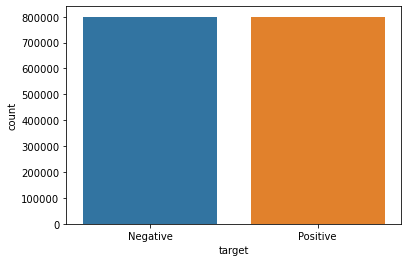

In [8]:
sns.countplot(x='target', data=df);
print (df.target.value_counts())

thankfully, the dataset is equally splited each target has 800,000 values

In [9]:
df.head(20)

target                                               text
0   Negative  @switchfoot http://twitpic.com/2y1zl - Awww, t...
1   Negative  is upset that he can't update his Facebook by ...
2   Negative  @Kenichan I dived many times for the ball. Man...
3   Negative    my whole body feels itchy and like its on fire 
4   Negative  @nationwideclass no, it's not behaving at all....
5   Negative                      @Kwesidei not the whole crew 
6   Negative                                        Need a hug 
7   Negative  @LOLTrish hey  long time no see! Yes.. Rains a...
8   Negative               @Tatiana_K nope they didn't have it 
9   Negative                          @twittera que me muera ? 
10  Negative        spring break in plain city... it's snowing 
11  Negative                         I just re-pierced my ears 
12  Negative  @caregiving I couldn't bear to watch it.  And ...
13  Negative  @octolinz16 It it counts, idk why I did either...
14  Negative  @smarrison i would've been the first, but i di...
15  Negative  @iamjazzyfizzle I wish I got to watch it with ...
16  Negative  Hollis' death scene will hurt me severely to w...
17  Negative                               about to file taxes 
18  Negative  @LettyA ahh ive always wanted to see rent  lov...
19  Negative  @FakerPattyPattz Oh dear. Were you drinking ou...

In [10]:
df.tail(20)

target                                               text
1599980  Positive  @myheartandmind jo jen by nemuselo zrovna té h...
1599981  Positive  Another Commenting Contest! [;: Yay!!!  http:/...
1599982  Positive  @thrillmesoon i figured out how to see my twee...
1599983  Positive  @oxhot theri tomorrow, drinking coffee, talkin...
1599984  Positive  You heard it here first -- We're having a girl...
1599985  Positive  if ur the lead singer in a band, beware fallin...
1599986  Positive              @tarayqueen too much ads on my blog. 
1599987  Positive  @La_r_a NEVEER  I think that you both will get...
1599988  Positive  @Roy_Everitt ha- good job. that's right - we g...
1599989  Positive                 @Ms_Hip_Hop im glad ur doing well 
1599990  Positive                              WOOOOO! Xbox is back 
1599991  Positive  @rmedina @LaTati Mmmm  That sounds absolutely ...
1599992  Positive                  ReCoVeRiNg FrOm ThE lOnG wEeKeNd 
1599993  Positive                                  @SCOOBY_GRITBOYS 
1599994  Positive  @Cliff_Forster Yeah, that does work better tha...
1599995  Positive  Just woke up. Having no school is the best fee...
1599996  Positive  TheWDB.com - Very cool to hear old Walt interv...
1599997  Positive  Are you ready for your MoJo Makeover? Ask me f...
1599998  Positive  Happy 38th Birthday to my boo of alll time!!! ...
1599999  Positive  happy #charitytuesday @theNSPCC @SparksCharity...

As was displayed above the dataset is indexed as negative comes first then positives so wee need to randomize it as for the traiin test split part, we don't need the most of the train set to contain negatives and of the test set contains positives, so we will randomize it

In [11]:
df = df.sample(frac=1).reset_index(drop=True)

In [12]:
df.head()

target                                               text
0  Positive  @LarryCarroll ARE WE GOING TO BE GETTING ANY N...
1  Positive  i made the milo crepe, not as good as i though...
2  Negative       @OrigSupawoman Hey you!! do you remeber me? 
3  Positive                       @Dazz1e_me Aww thanks  haha.
4  Negative  http://twitpic.com/7koh9 - Not-so-good Roast P...

### Preprocessing The Text

The text we have is from twitter so it contains @username, hyperlink texts, emoticons and punctuations so we gotta clean it for our model and we will Use NLTK library for it

- **Stemming/Lematization** 
Stemming and Lemmatization both generate the foundation sort of the inflected words and therefore the only difference is that stem may not be an actual word whereas, lemma is an actual language word. Stemming follows an algorithm with steps to perform on the words which makes it faster.
- adjustable >> adjust #stemming
- was >> (to) be # Lematization

- **Hyperlinks and Mentions**
Twitter is a social media platform where people can tag and mentions other people's ID and share videos and blogs from internet. So the tweets often contain lots of Hyperlinks and twitter mentions.
- Mentions >> @mazen, @someone
- Hyperlinks >>  https://keras.io, https://tensorflow.org

- **Stopwords**
Stopwords are commonly used words in English which have no contextual meaning in an sentence. So therefore we remove them before classification.
'I', 'my', 'myself', 'ourself'

In [13]:
import nltk 
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
import re

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Mazen\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [14]:
stop_words = stopwords.words('english')
stemmer = SnowballStemmer('english')
text_regex = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"
# this regex is for mentions and links, regex can be so fancy I got this regex from here
# https://gist.github.com/ryanblock/3506204

In [15]:
def clean_text(text, stem=False):
  text = re.sub(text_regex, ' ', str(text).lower()).strip()
  tokens = []
  for token in text.split():
    if token not in stop_words:
      if stem:
        tokens.append(stemmer.stem(token))
      else:
        tokens.append(token)
  return " ".join(tokens)

In [16]:
df.text = df.text.apply(lambda x: clean_text(x))

In [17]:
df.head(10)

target                                               text
0  Positive  going getting nm updates time around really sc...
1  Positive  made milo crepe good thought wasnt sweet owell...
2  Negative                                        hey remeber
3  Positive                                    aww thanks haha
4  Negative                                good roast potatoes
5  Negative  haha thats annoying way im allowed follow anyo...
6  Positive            watching show makes want find jack even
7  Negative  man smells piss gotten bus still smells like piss
8  Positive                       could lucky would incredible
9  Negative   oh weirdest dream nicolerichie seemed go forever

I think this is beautiful! how python can be so powerful
<br>
The  remaining thing is tokenizing

### Wordclouds For postives and Negatives

#### Positives

In [18]:
from wordcloud import WordCloud

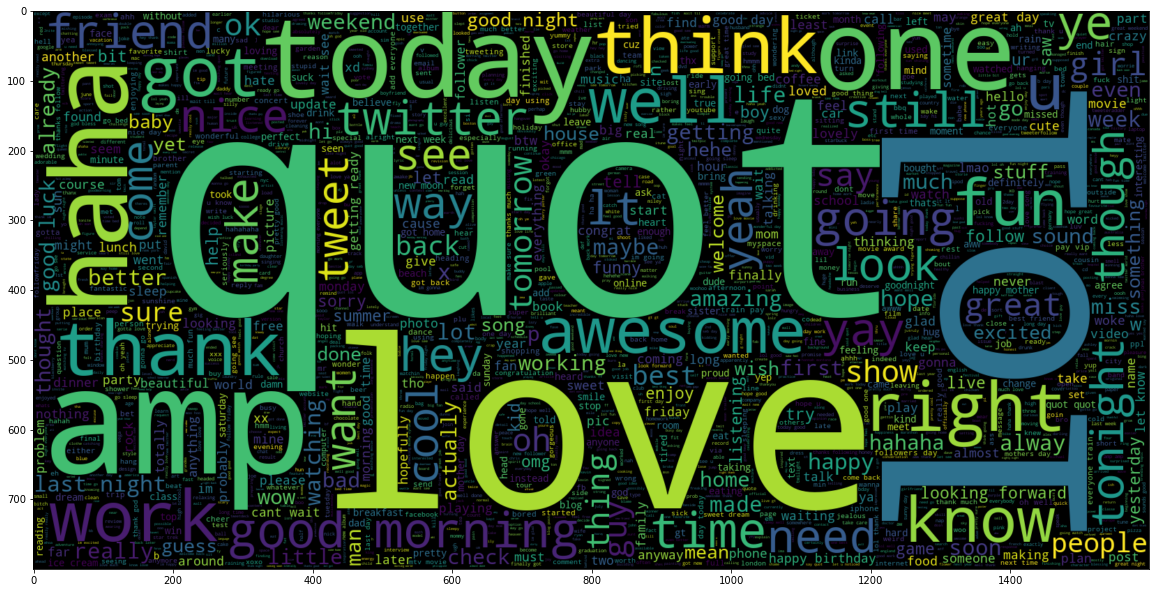

In [19]:
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df[df.target == 'Positive'].text))
plt.imshow(wc , interpolation = 'bilinear');

#### Negatives

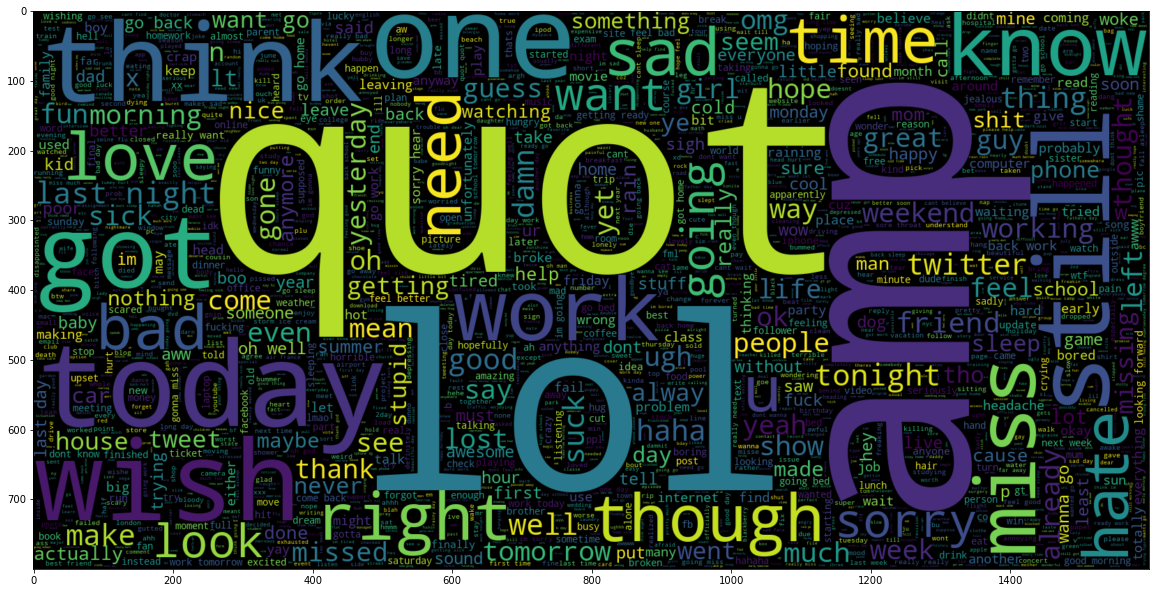

In [20]:
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df[df.target == 'Negative'].text))
plt.imshow(wc , interpolation = 'bilinear');

### Model Prepairing and Encoding

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X, y = train_test_split(df, test_size=.20, random_state=42)
# I will make 80% of the data for the training as we still have another tweets 

In [23]:
X.shape, y.shape

((1280000, 2), (320000, 2))

**NOTE:** We could use Word2Vec or tfidf then we classify the data with LogisticRegression or SVM but in our case the data is so big it will extremly hard and slow to Tune the model and we won't gett a good model as you know Machine learning is the art of experimenting
<br>
The Perfect option here is to use Nueral Networks, it doesn't need much tuning and It can runs on my GPU much faster

### Tokenization

Given a character sequence and a defined document unit, tokenization is the task of chopping it up into pieces, called tokens , perhaps at the same time throwing away certain characters, such as punctuation. The process is called Tokenization.

**Tokinzer** create tokens for every word in the data corpus and map them to a index using dictionary.

**Word Index** contains the index for each word

**Vocab Size** represents the total number of word in the data corpus

In [24]:
from keras.preprocessing.text import Tokenizer

In [25]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X.text)
word_index = tokenizer.word_index
vocab_size = len(tokenizer.word_index) + 1

In [26]:
print (vocab_size)

290930


Now we will use **Pad Sequence**
<br>
what does it to ?
It is used to ensure that all sequences in a list have the same length, By default this is done by padding 0 in the beginning of each sequence until each sequence has the same length as the longest sequence.

In [27]:
from keras.preprocessing.sequence import pad_sequences

In [28]:
x_train = pad_sequences(tokenizer.texts_to_sequences(X.text),
                        maxlen =30)
x_test = pad_sequences(tokenizer.texts_to_sequences(y.text),
                       maxlen = 30)

Maxlen:
<br>
In the dataset, there will n number of training samples. In the context of NLP, these training samples are not guaranteed to be of fixed length. Some may be of length 1024, some may be of length 24 and so on.
in our model, that is used in the example needs datasamples to be of fixed length. Inorder to make sure that all the samples are of atleast a minimum length, they will be padded. Here post padding is used so I assgned it to be 30 as I already tOkenized words we don't need very high value.

### Encoding
The goal here is to classify a binary values of 0 & 1, As Machine Learning don't understand String on our target values, we will encode it

In [29]:
from sklearn.preprocessing import LabelEncoder

In [30]:
LE = LabelEncoder()
LE.fit(X.target.to_list())

y_train = LE.transform(X.target.to_list())
y_test = LE.transform(y.target.to_list())

y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

In [31]:
y_train.shape, y_test.shape

((1280000, 1), (320000, 1))

### Word Embeding

What is **Word Embeding** ?
<br>
A word embedding is a learned representation for text where words that have the same meaning have a similar representation. It is this approach to representing words and documents that may be considered one of the key breakthroughs of deep learning on challenging natural language processing problems

There is many  GloVe & Word2Vec types we will use one ffrom Stanford Ai
<br>
https://nlp.stanford.edu/projects/glove/
<br>
And I already had the package and I wanted to try it
<br>
you can download it from here 
<br>
http://nlp.stanford.edu/data/glove.6B.zip

In [32]:
GLOVE_EMB = r'C:\Users\Mazen\Downloads\archive\glove.6B.300d.txt'
EMBEDDING_DIM = 300
LR = 1e-3
BATCH_SIZE = 1024
EPOCHS = 1
MODEL_PATH = r'C:\Users\Mazen\Downloads\archive\final_model.hdf5'

Loading out GloVe and specifying batch, epoches sizes

In [33]:
embeddings_index = {}

f = open(GLOVE_EMB, encoding="utf8")
for line in f:
  values = line.split()
  word = value = values[0]
  coefs = np.asarray(values[1:], dtype='float32')
  embeddings_index[word] = coefs
f.close()

In [34]:
print(len(embeddings_index))

400000


In [35]:
embedding_matrix = np.zeros((vocab_size, EMBEDDING_DIM))
for word, i in word_index.items():
  embedding_vector = embeddings_index.get(word)
  if embedding_vector is not None:
    embedding_matrix[i] = embedding_vector

In [36]:
import tensorflow as tf
import keras

In [37]:
embedding_layer = tf.keras.layers.Embedding(vocab_size,
                                          EMBEDDING_DIM,
                                          weights=[embedding_matrix],
                                          input_length=30,
                                          trainable=False)

Now we Embed our Glove as keras layer that we will use for Nueral Networks

### Now to the Nueral Networks

In [38]:
from tensorflow.keras.layers import Conv1D, Bidirectional, LSTM, Dense, Input, Dropout
from tensorflow.keras.layers import SpatialDropout1D
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau

In [39]:
sequence_input = Input(shape=(30,), dtype='int32')
embedding_sequences = embedding_layer(sequence_input)
x = SpatialDropout1D(0.2)(embedding_sequences)
x = Conv1D(64, 5, activation='relu')(x)
x = Bidirectional(LSTM(64, dropout=0.2, recurrent_dropout=0.2))(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(512, activation='relu')(x)
outputs = Dense(1, activation='sigmoid')(x)
model = tf.keras.Model(sequence_input, outputs)

The input shape will be 30 as it is the same as MaxLen we defiened
<br>
I used relu activation across all the layers except for the Dense Layer as It must be sigmoid for classifying problems as the 
target is from 0 to 1
<br>
the droptout layer is to prevent overfitting I tried to make it .7 but .5 gave me better accuracy
<br>
"***Please Ignore this stupid CuDNN warnnings, Running tensorflow on GPU has so many problems :(****"

In [40]:
model.compile(optimizer=Adam(learning_rate=LR), loss='binary_crossentropy',
              metrics=['accuracy'])
ReduceLROnPlateau = ReduceLROnPlateau(factor=0.1,
                                     min_lr = 0.01,
                                     monitor = 'val_loss',
                                     verbose = 1)

Now we use Adam Optimizer , I tried Gradient Descent Optimzer but Adam gave me higher accuracy, Again Machine Learning is the art of experimenting !
<br>
For the Learning rate paramaters I did similar project on NLP before I just copied them

I trained this model using Google Colab workspace as it smoothly run on my GPU but here locally there is some problems with CUDNN so I used only 1 epoch so it won't take much time, but generally accuracy is higher when using more epochs

In [41]:
history = model.fit(x_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS,
                    validation_data=(x_test, y_test), callbacks=[ReduceLROnPlateau])

1250/1250 [==============================] - 575s 442ms/step - loss: 0.5189 - accuracy: 0.7392 - val_loss: 0.4831 - val_accuracy: 0.7648


.76 Accuracy isn't that bad on 1 epoch but I dot around .81 when using google Colab

### Evaluating The Model

In [42]:
score = model.evaluate(x_test, y_test, batch_size=BATCH_SIZE)
print('-----')
print("ACCURACY:",score[1])
print("LOSS:",score[0])

313/313 [==============================] - 29s 91ms/step - loss: 0.4831 - accuracy: 0.7648
-----
ACCURACY: 0.764787495136261
LOSS: 0.4831133782863617


# Sentimental Analysis

## Prepairing tweets data

Getting the data is specefied in the other ipynb , please check it I just used diffrent Notebook cuz twiitter API Consume Most of the Memory and this kernal is pretty heavy so I didn't want it to crash
<br>
"I Also needed a clean workspace, things here are little bit messy (:"

In [43]:
df = pd.read_csv('teams.csv')

Ok, Why I chose **Manchester united** and **Barcelona** ?
If you are following footbal 'or not even following it you must have read it somewhere in social media' Reccently Cristiano Ronaldo joined his old team again which is united and he left juventus and Most people are very happy with that On the other side Messi also reccently left his olf team Barcelona and He was there for over 20 years!! and also most of people are sad or negative about it and the team is performing so badly without him
<br>
Wow that matches our problem here !, We needed 2 campains to see if tweets are positive or negative

In [44]:
df.head()

tweet                 date  \
0  “I can’t now”- 29-year-old Tottenham superstar...  2021-09-17 17:54:28   
1  Ryan Giggs\nClub :- Manchester United  \nYears...  2021-09-17 17:54:11   
2  How long does it take for Manchester United me...  2021-09-17 17:54:08   
3  Can just imagine Ole shouting  "This is Manche...  2021-09-17 17:53:38   
4  Carles Puyol\nClub :- Barcelona\nYears :- 1999...  2021-09-17 17:53:33   

         Team  
0  Manchester  
1  Manchester  
2  Manchester  
3  Manchester  
4  Manchester

Now let's Claen the Tweets text with the function we build earlier

In [45]:
df.tweet = df.tweet.apply(lambda x: clean_text(x))

In [46]:
df.head()

tweet                 date  \
0  29 year old tottenham superstar reveals suppor...  2021-09-17 17:54:28   
1  ryan giggs club manchester united years 1990 2...  2021-09-17 17:54:11   
2  long take manchester united membership card ar...  2021-09-17 17:54:08   
3  imagine ole shouting manchester united ears pl...  2021-09-17 17:53:38   
4  carles puyol club barcelona years 1999 2014 ap...  2021-09-17 17:53:33   

         Team  
0  Manchester  
1  Manchester  
2  Manchester  
3  Manchester  
4  Manchester

Much better

Word cloud For Manchester

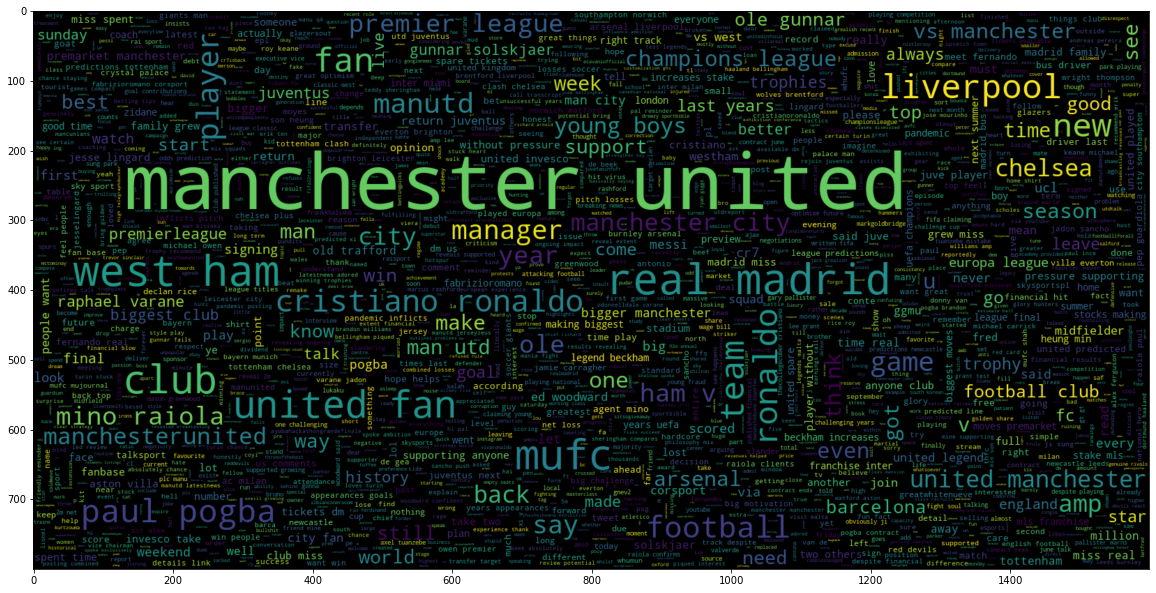

In [47]:
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df[df.Team == 'Manchester'].tweet))
plt.imshow(wc , interpolation = 'bilinear');

Word cloud for Barcelona

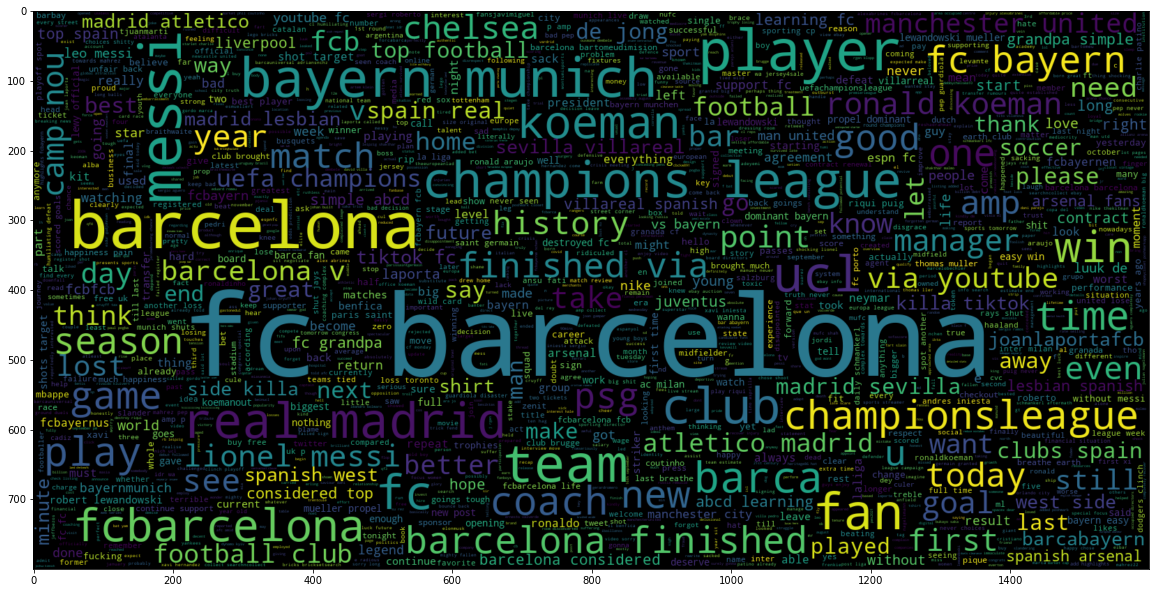

In [48]:
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df[df.Team == 'Barcelona'].tweet))
plt.imshow(wc , interpolation = 'bilinear');

In [49]:
x = df.tweet

In [50]:
x.head()

0    29 year old tottenham superstar reveals suppor...
1    ryan giggs club manchester united years 1990 2...
2    long take manchester united membership card ar...
3    imagine ole shouting manchester united ears pl...
4    carles puyol club barcelona years 1999 2014 ap...
Name: tweet, dtype: object

Now lets tokenize this text

In [51]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(x)
word_index = tokenizer.word_index
vocab_size = len(tokenizer.word_index) + 1

In [52]:
print (vocab_size)

5572


In [53]:
x = pad_sequences(tokenizer.texts_to_sequences(x),
                        maxlen =30)

In [54]:
result = model.predict(x)

In [90]:
result

array([[0.17013289],
       [0.15146396],
       [0.8178937 ],
       ...,
       [0.4374948 ],
       [0.72070616],
       [0.70705074]], dtype=float32)

In [122]:
df['value'] = result

In [123]:
df.head()

tweet                 date  \
0  29 year old tottenham superstar reveals suppor...  2021-09-17 17:54:28   
1  ryan giggs club manchester united years 1990 2...  2021-09-17 17:54:11   
2  long take manchester united membership card ar...  2021-09-17 17:54:08   
3  imagine ole shouting manchester united ears pl...  2021-09-17 17:53:38   
4  carles puyol club barcelona years 1999 2014 ap...  2021-09-17 17:53:33   

         Team     value  
0  Manchester  0.170133  
1  Manchester  0.151464  
2  Manchester  0.817894  
3  Manchester  0.614577  
4  Manchester  0.804450

Now Let's change our Sentimental Value < .5 for Negative & > .5 for Positive

In [124]:
df['value']= df['value'].astype(str)

In [125]:
df.loc[df['value'] > '0.6', 'value'] = 'Positive'
df.loc[df['value'] < '0.4', 'value'] = 'Negative'
df.loc[df['value'].between('0.4', '0.6'), 'value'] = 'Neutral'           

In [126]:
df.head(20)

tweet                 date  \
0   29 year old tottenham superstar reveals suppor...  2021-09-17 17:54:28   
1   ryan giggs club manchester united years 1990 2...  2021-09-17 17:54:11   
2   long take manchester united membership card ar...  2021-09-17 17:54:08   
3   imagine ole shouting manchester united ears pl...  2021-09-17 17:53:38   
4   carles puyol club barcelona years 1999 2014 ap...  2021-09-17 17:53:33   
5   good read great lede beloved confusing global ...  2021-09-17 17:53:07   
6   marcus rashford feature behind closed doors fr...  2021-09-17 17:52:58   
7   thefootyarena everton manchester city manchest...  2021-09-17 17:52:54   
8   yes manchester united try sign dm summer saga ...  2021-09-17 17:52:05   
9   ian wright makes admission paul pogba cristian...  2021-09-17 17:52:03   
10     previously target manchester united joke throw  2021-09-17 17:51:39   
11  sancho slander hits different cus manchester u...  2021-09-17 17:51:35   
12  footyaccums yeah time see type atmosphere empt...  2021-09-17 17:51:02   
13  fc barcelona bigger club manchester united eve...  2021-09-17 17:50:44   
14  real madrid manchester united 2 biggest clubs oat  2021-09-17 17:50:38   
15  waynepaulheath1 collnjr2 frankkhaliduk gnev2 a...  2021-09-17 17:50:25   
16  would say manchester city enjoyer manchester u...  2021-09-17 17:50:17   
17             pinned till manchester united wins epl  2021-09-17 17:49:44   
18  manchester united plc manu q4 2021 earnings ca...  2021-09-17 17:49:24   
19                  21 22 manchester united shirts 35  2021-09-17 17:49:16   

          Team     value  
0   Manchester  Negative  
1   Manchester  Negative  
2   Manchester  Positive  
3   Manchester  Positive  
4   Manchester  Positive  
5   Manchester  Negative  
6   Manchester   Neutral  
7   Manchester  Positive  
8   Manchester  Positive  
9   Manchester  Positive  
10  Manchester   Neutral  
11  Manchester   Neutral  
12  Manchester  Negative  
13  Manchester  Positive  
14  Manchester   Neutral  
15  Manchester  Positive  
16  Manchester  Negative  
17  Manchester  Negative  
18  Manchester  Positive  
19  Manchester  Positive

<AxesSubplot:xlabel='Team', ylabel='count'>

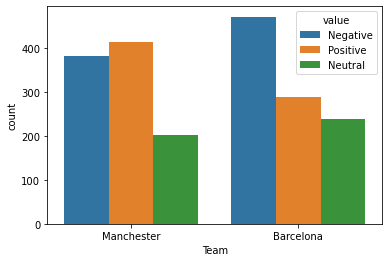

In [127]:
sns.countplot(x='Team', hue='value', data=df)

We Reached our Goal !!
<br>
Am sure that manchester will skew a little to Positives but due that we have no much tweets it appears like it is equal

### Refrences with Workflow

- Twitter Preprocessing and Text Cleaning with Regex: [Here](https://www.kdnuggets.com/2016/06/mining-twitter-data-python-part-2.html)
- NLTK Stop Words: [Here](https://pythonspot.com/nltk-stop-words/)
- Creating Word Cloud plot: [Here](https://www.datacamp.com/community/tutorials/wordcloud-python)
- Sentdex Helped me much with Tokenization and all the playlist with helpful: [Here](https://www.youtube.com/watch?v=FLZvOKSCkxY&ab_channel=sentdex)
- How Word Embeding Works: [Here](https://www.youtube.com/watch?v=pO_6Jk0QtKw)
- Stanford's Embeding library: [Here](https://rcpedia.stanford.edu/topicGuides/textProcessingWord_Embeddings.html)
- Neural Networks for Text Classification: [Here](https://www.youtube.com/watch?v=VxHy1lQRzvs)
- This Helped me getiing best Hyperparamters, Optimizers, Activation Functions for the Neural Networks: [Here](https://realpython.com/python-keras-text-classification/)
- Using Tweepy and Twitter API: [Here](https://www.earthdatascience.org/courses/use-data-open-source-python/intro-to-apis/twitter-data-in-python/)
